In [2]:
import pandas as pd

## Carregando e limpando os dados

In [3]:
df = pd.read_csv('events.csv', low_memory=False)

In [4]:
df.head()

,event_type,event_id,event_source,user_id,domain,client_uuid,freight_hostname,freight_id,ip,day,...,card_expiration_date,payment_source_country,is_default,is_greeting,icon_hash,previous_store_state,current_store_state,guild_template_code,guild_template_name,guild_template_guild_id
0,channel_opened,AQMFxiBChLGU/YwXF8pollsptwAAABI=,client,784862826048126976,Tns,KAAC+JRk5AoIKIMhMqiTenkBAAASAAAA,analytics-ingest-prd-rvpl,tQsPL6eOAOY7oX8WUSG3OA==,177.222.185.180,162,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,channel_opened,AQMFFJpFoBtmYjhphziDp8MzoQAAAAw=,client,784862826048126976,Tns,KAAC+JRk5ArYrI61Sdk883cBAAAMAAAA,analytics-ingest-prd-n9q5,Hg50oCm-QOvQB2UWfpfRMQ==,177.222.185.163,86,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,channel_opened,AQMF1VQHB/AJkTi8Gec258/KqAAAAAs=,client,784862826048126976,Tns,KAAC+JRk5AqmWSa9emD3wnkBAAALAAAA,analytics-ingest-prd-jjqc,mmxDz4OLU6FVPIMWD099-w==,177.222.185.181,176,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,channel_opened,AQMF1JtWZeCoDmTbbpAtSct6MQAAAAs=,client,784862826048126976,Tns,KAAC+JRk5AqTlU8ELR2etHoBAAALAAAA,analytics-ingest-prd-rmmn,K3tnY5QbCyoc-pEW_gqrow==,177.222.185.179,223,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,channel_opened,AQMFLDIvKONAgXc0ZxNEgrkipQAAAs8=,client,784862826048126976,Tns,KAAC+JRk5AplXJk8Q0oygHkBAADPAgAA,analytics-ingest-prd-6wv9,_BF1I71r1yhMfnwWvKKKog==,177.222.185.180,164,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62026 entries, 0 to 62025
Columns: 437 entries, event_type to guild_template_guild_id
dtypes: bool(1), float64(284), int64(2), object(150)
memory usage: 206.4+ MB


### Coluna "event_type" muito provavelmente relacionada ao tipo de ação que fazemos no Discord

In [6]:
df.event_type.unique()

array(['channel_opened', 'register_attempt_captcha', 'start_speaking',
       'update_connected_account', 'session_start', 'send_message',
       'leave_voice_channel', 'captcha_served', 'channel_deleted',
       'message_edited', 'start_listening', 'age_gate_submitted',
       'open_popout', 'update_user_settings', 'delete_guild',
       'sku_entitlement_updated', 'application_created', 'create_channel',
       'guild_bot_added', 'guild_member_updated', 'account_link_step',
       'add_channel_recipient', 'register_attempted',
       'user_avatar_updated', 'experiment_user_triggered',
       'message_deleted', 'add_reaction', 'session_end',
       'channel_permissions_overwrite_updated', 'resolve_invite',
       'join_voice_channel', 'ack_messages', 'email_sent',
       'payment_flow_step', 'voice_disconnect',
       'premium_guild_subscription_created', 'user_account_updated',
       'video_input_toggled', 'verify_account', 'accepted_instant_invite',
       'register_viewed', 'channe

### Checando as colunas...

In [7]:
for coluna in df.columns:
    print(coluna)

event_type
event_id
event_source
user_id
domain
client_uuid
freight_hostname
freight_id
ip
day
chosen_locale
detected_locale
user_is_authenticated
browser
cfduid
os
os_version
os_arch
client_build_number
release_channel
client_version
client_performance_cpu
client_performance_memory
city
country_code
region_code
time_zone
isp
channel_id
channel_type
channel_size_total
channel_member_perms
channel_hidden
accessibility_support_enabled
accessibility_features
channel_is_nsfw
system_locale
client_send_timestamp
client_track_timestamp
timestamp
guild_id
guild_size_total
guild_member_num_roles
guild_member_perms
guild_num_channels
guild_num_text_channels
guild_num_voice_channels
guild_num_roles
guild_is_vip
is_member
num_voice_channels_active
browser_user_agent
device
os_sdk_version
device_advertiser_id
channel_view
browser_version
referrer
referrer_current
referring_domain
referring_domain_current
search_engine
search_engine_current
full
instant_invite
ip_blacklists
has_invalid_fingerprint
f

### Vi algumas colunas de duração, checando uma delas

In [18]:
df_duracao_conectado = df[df['duration_connected'] > 1]

In [19]:
df_duracao_conectado.head()

,event_type,event_id,event_source,user_id,domain,client_uuid,freight_hostname,freight_id,ip,day,...,card_expiration_date,payment_source_country,is_default,is_greeting,icon_hash,previous_store_state,current_store_state,guild_template_code,guild_template_name,guild_template_guild_id
19902,voice_disconnect,AQMFDRAfbP57Hs1Rf6BrIw7spQAAAec=,client,784862826048126976,Tns,KAAC+JRk5Ao41fCZUO48SXoBAADnAQAA,analytics-ingest-prd-nq6g,QQHyttg1-oP7p4oWVuh5gA==,177.222.185.180,203,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19903,voice_disconnect,AQMFL5zw4uYLc77nrI/qOL4YrAAAAgM=,client,784862826048126976,Tns,KAAC+JRk5Ao4ZmgtVUwN/3gBAAADAgAA,analytics-ingest-prd-jjzm,0cPYuzMQfe0wR3cWADjoPw==,177.222.185.186,139,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19904,voice_disconnect,AQMFzsmBhVpQImDndcf87vSZdwAABBY=,client,784862826048126976,Tns,KAAC+JRk5Ao5nS+kc3EYRXcBAAAWBAAA,analytics-ingest-prd-xv36,TemRC2AXWzVAFF4WiX_8Mw==,177.222.183.83,53,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19905,voice_disconnect,AQMFzsmBhVpQImDndcf87vSZdwAAAEY=,client,784862826048126976,Tns,KAAC+JRk5Ao5nS+kc3EYRXcBAABGAAAA,analytics-ingest-prd-krtn,vKyFY4kRQPzmiFwWheK3hQ==,177.222.183.83,52,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19906,voice_disconnect,AQMFzsmBhVpQImDndcf87vSZdwAAAVE=,client,784862826048126976,Tns,KAAC+JRk5Ao5nS+kc3EYRXcBAABRAQAA,analytics-ingest-prd-xv36,TemRC2AXWzVAFF4WBbg1GQ==,177.222.183.83,53,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
df_duracao_conectado.shape

(1770, 437)

### Talvez o "event_type" == "voice_disconnect" seja o evento que tenhamos os dados de tempo conectado em call

In [21]:
df_duracao_conectado['event_type'].unique()

array(['voice_disconnect'], dtype=object)

In [22]:
df_evento_desconectar = df[df['event_type'] == 'voice_disconnect']

In [23]:
df_evento_desconectar.head()

,event_type,event_id,event_source,user_id,domain,client_uuid,freight_hostname,freight_id,ip,day,...,card_expiration_date,payment_source_country,is_default,is_greeting,icon_hash,previous_store_state,current_store_state,guild_template_code,guild_template_name,guild_template_guild_id
19902,voice_disconnect,AQMFDRAfbP57Hs1Rf6BrIw7spQAAAec=,client,784862826048126976,Tns,KAAC+JRk5Ao41fCZUO48SXoBAADnAQAA,analytics-ingest-prd-nq6g,QQHyttg1-oP7p4oWVuh5gA==,177.222.185.180,203,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19903,voice_disconnect,AQMFL5zw4uYLc77nrI/qOL4YrAAAAgM=,client,784862826048126976,Tns,KAAC+JRk5Ao4ZmgtVUwN/3gBAAADAgAA,analytics-ingest-prd-jjzm,0cPYuzMQfe0wR3cWADjoPw==,177.222.185.186,139,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19904,voice_disconnect,AQMFzsmBhVpQImDndcf87vSZdwAABBY=,client,784862826048126976,Tns,KAAC+JRk5Ao5nS+kc3EYRXcBAAAWBAAA,analytics-ingest-prd-xv36,TemRC2AXWzVAFF4WiX_8Mw==,177.222.183.83,53,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19905,voice_disconnect,AQMFzsmBhVpQImDndcf87vSZdwAAAEY=,client,784862826048126976,Tns,KAAC+JRk5Ao5nS+kc3EYRXcBAABGAAAA,analytics-ingest-prd-krtn,vKyFY4kRQPzmiFwWheK3hQ==,177.222.183.83,52,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19906,voice_disconnect,AQMFzsmBhVpQImDndcf87vSZdwAAAVE=,client,784862826048126976,Tns,KAAC+JRk5Ao5nS+kc3EYRXcBAABRAQAA,analytics-ingest-prd-xv36,TemRC2AXWzVAFF4WBbg1GQ==,177.222.183.83,53,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [27]:
df_duracoes = df_evento_desconectar[['duration_connected', 'duration_speaking', 'duration_listening']]

In [28]:
df_duracoes.head()

,duration_connected,duration_speaking,duration_listening
19902,194.0,1.0,184.0
19903,15104.0,3820.0,12067.0
19904,5069.0,2626.0,2933.0
19905,1965.0,1965.0,2.0
19906,4121.0,478.0,2097.0


In [31]:
df_duracoes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1922 entries, 19902 to 60584
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   duration_connected  1827 non-null   float64
 1   duration_speaking   1827 non-null   float64
 2   duration_listening  1827 non-null   float64
dtypes: float64(3)
memory usage: 60.1 KB


In [32]:
df_duracoes.sum()

duration_connected    5554679.0
duration_speaking     2158258.0
duration_listening    3223438.0
dtype: float64

<AxesSubplot:>

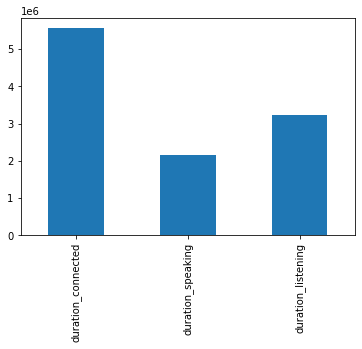

In [34]:
df_duracoes.sum().plot(kind='bar')

In [58]:
df_duracoes.duration_connected.max()

36642.0

### Os números parecem estar em segundos. 

In [45]:
seg_para_min = df_duracoes.duration_connected.max() / 60

In [46]:
seg_para_min

610.7

In [44]:
min_para_hora = seg_para_hora / 60

### A maior duração que seria de 10h é bem realista. 

In [47]:
min_para_hora 

10.178333333333335

<AxesSubplot:>

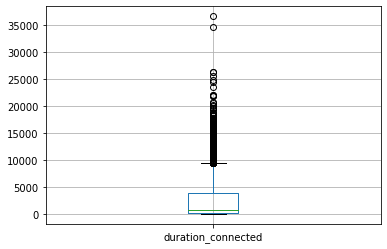

In [65]:
df_duracoes.boxplot('duration_connected')

In [73]:
media_conexao = df_duracoes.duration_connected.mean()

In [74]:
media_conexao

3040.327859879584

### Considerando a grande quantidade de outliers, o tempo de 50min em call me parece justo. 

In [69]:
(media_conexao / 60) 

50.67213099799307

In [75]:
df_duracoes.rename(columns={'duration_connected': 'tempo_conectado_seg', 'duration_speaking': 'tempo_falando_seg',
         'duration_listening': 'tempo_escutando_seg'}, inplace=True)

c:\users\natan\pycharmprojects\projeto_modulo5\venv\lib\site-packages\pandas\core\frame.py:5034: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [76]:
df_duracoes.reset_index(inplace=True)

In [77]:
df_duracoes.drop(columns='index', inplace=True)

c:\users\natan\pycharmprojects\projeto_modulo5\venv\lib\site-packages\pandas\core\frame.py:4901: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [78]:
df_duracoes.head()

,tempo_conectado_seg,tempo_falando_seg,tempo_escutando_seg
0,194.0,1.0,184.0
1,15104.0,3820.0,12067.0
2,5069.0,2626.0,2933.0
3,1965.0,1965.0,2.0
4,4121.0,478.0,2097.0


In [79]:
df_duracoes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1922 entries, 0 to 1921
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   tempo_conectado_seg  1827 non-null   float64
 1   tempo_falando_seg    1827 non-null   float64
 2   tempo_escutando_seg  1827 non-null   float64
dtypes: float64(3)
memory usage: 45.2 KB


### Procurando os nulos

In [80]:
df_duracoes.loc[df_duracoes['tempo_conectado_seg'].isnull()]

,tempo_conectado_seg,tempo_falando_seg,tempo_escutando_seg
206,NaN,NaN,NaN
207,NaN,NaN,NaN
208,NaN,NaN,NaN
209,NaN,NaN,NaN
210,NaN,NaN,NaN
...,...,...,...
1762,NaN,NaN,NaN
1763,NaN,NaN,NaN
1764,NaN,NaN,NaN
1765,NaN,NaN,NaN


In [81]:
df_duracoes.dropna(inplace=True)

c:\users\natan\pycharmprojects\projeto_modulo5\venv\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [82]:
df_duracoes.head()

,tempo_conectado_seg,tempo_falando_seg,tempo_escutando_seg
0,194.0,1.0,184.0
1,15104.0,3820.0,12067.0
2,5069.0,2626.0,2933.0
3,1965.0,1965.0,2.0
4,4121.0,478.0,2097.0


In [84]:
df_duracoes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1827 entries, 0 to 1921
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   tempo_conectado_seg  1827 non-null   float64
 1   tempo_falando_seg    1827 non-null   float64
 2   tempo_escutando_seg  1827 non-null   float64
dtypes: float64(3)
memory usage: 57.1 KB


### Vamos colocar o tempo em minutos e horas, talvez usaremos futuramente

In [86]:
df_duracoes['tempo_conectado_min'] = round(df_duracoes['tempo_conectado_seg'] / 60, 2)

c:\users\natan\pycharmprojects\projeto_modulo5\venv\lib\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


In [87]:
df_duracoes['tempo_falando_min'] = round(df_duracoes['tempo_falando_seg'] / 60, 2)

In [88]:
df_duracoes['tempo_escutando_min'] = round(df_duracoes['tempo_escutando_seg'] / 60, 2)

In [90]:
df_duracoes.head()

,tempo_conectado_seg,tempo_falando_seg,tempo_escutando_seg,tempo_conectado_min,tempo_falando_min,tempo_escutando_min
0,194.0,1.0,184.0,3.23,0.02,3.07
1,15104.0,3820.0,12067.0,251.73,63.67,201.12
2,5069.0,2626.0,2933.0,84.48,43.77,48.88
3,1965.0,1965.0,2.0,32.75,32.75,0.03
4,4121.0,478.0,2097.0,68.68,7.97,34.95


In [65]:
df_duracoes['tempo_conectado_hora'] = round(df_duracoes['tempo_conectado_min'] / 60, 2)

In [66]:
df_duracoes['tempo_falando_hora'] = round(df_duracoes['tempo_falando_min'] / 60, 2)

In [91]:
df_duracoes['tempo_escutando_hora'] = round(df_duracoes['tempo_escutando_min'] / 60, 2)

c:\users\natan\pycharmprojects\projeto_modulo5\venv\lib\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


In [92]:
df_duracoes.head()

,tempo_conectado_seg,tempo_falando_seg,tempo_escutando_seg,tempo_conectado_min,tempo_falando_min,tempo_escutando_min,tempo_escutando_hora
0,194.0,1.0,184.0,3.23,0.02,3.07,0.05
1,15104.0,3820.0,12067.0,251.73,63.67,201.12,3.35
2,5069.0,2626.0,2933.0,84.48,43.77,48.88,0.81
3,1965.0,1965.0,2.0,32.75,32.75,0.03,0.00
4,4121.0,478.0,2097.0,68.68,7.97,34.95,0.58


In [93]:
df_duracoes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1827 entries, 0 to 1921
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   tempo_conectado_seg   1827 non-null   float64
 1   tempo_falando_seg     1827 non-null   float64
 2   tempo_escutando_seg   1827 non-null   float64
 3   tempo_conectado_min   1827 non-null   float64
 4   tempo_falando_min     1827 non-null   float64
 5   tempo_escutando_min   1827 non-null   float64
 6   tempo_escutando_hora  1827 non-null   float64
dtypes: float64(7)
memory usage: 114.2 KB


In [94]:
df_duracoes.reset_index(inplace=True)

In [95]:
df_duracoes.drop(columns='index', inplace=True)

c:\users\natan\pycharmprojects\projeto_modulo5\venv\lib\site-packages\pandas\core\frame.py:4901: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [96]:
df_duracoes.head()

,tempo_conectado_seg,tempo_falando_seg,tempo_escutando_seg,tempo_conectado_min,tempo_falando_min,tempo_escutando_min,tempo_escutando_hora
0,194.0,1.0,184.0,3.23,0.02,3.07,0.05
1,15104.0,3820.0,12067.0,251.73,63.67,201.12,3.35
2,5069.0,2626.0,2933.0,84.48,43.77,48.88,0.81
3,1965.0,1965.0,2.0,32.75,32.75,0.03,0.00
4,4121.0,478.0,2097.0,68.68,7.97,34.95,0.58


In [97]:
df_duracoes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1827 entries, 0 to 1826
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   tempo_conectado_seg   1827 non-null   float64
 1   tempo_falando_seg     1827 non-null   float64
 2   tempo_escutando_seg   1827 non-null   float64
 3   tempo_conectado_min   1827 non-null   float64
 4   tempo_falando_min     1827 non-null   float64
 5   tempo_escutando_min   1827 non-null   float64
 6   tempo_escutando_hora  1827 non-null   float64
dtypes: float64(7)
memory usage: 100.0 KB


### Ready to Go!

In [70]:
df.to_csv('projeto05-discord.csv', index=False)